### Import Libraries and read Dataset.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import random
import warnings            
warnings.filterwarnings("ignore") 

#from pandas.tools.plotting import parallel_coordinates
import os

C:\Users\k1332\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('result.csv')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 255971 rows and 14 columns


In [3]:
df.head()

,Unnamed: 0,gamemode,mapname,skillrank,role,operator,platform,primaryweapon,secondaryweapon,secondarygadget,haswon,nbkills,isdead,count
0,0,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,PC,M249,PRB92,CLAYMORE,5,11,10,15
1,1,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,PC,M249,PRB92,STUN GRENADE,4,6,7,9
2,2,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,PC,PARA-308,PRB92,CLAYMORE,44,59,80,100
3,3,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,PC,PARA-308,PRB92,STUN GRENADE,45,61,67,95
4,4,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,PS4,M249,PRB92,CLAYMORE,14,28,30,38


In [4]:
#getting an overview of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255971 entries, 0 to 255970
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       255971 non-null  int64 
 1   gamemode         255971 non-null  object
 2   mapname          255971 non-null  object
 3   skillrank        255971 non-null  object
 4   role             255971 non-null  object
 5   operator         255971 non-null  object
 6   platform         255971 non-null  object
 7   primaryweapon    255971 non-null  object
 8   secondaryweapon  255971 non-null  object
 9   secondarygadget  255971 non-null  object
 10  haswon           255971 non-null  int64 
 11  nbkills          255971 non-null  int64 
 12  isdead           255971 non-null  int64 
 13  count            255971 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 27.3+ MB


### Checking Null Values

In [5]:
print("Are There Missing Data? :",df.isnull().any().any())
print(df.isnull().sum())

Are There Missing Data? : False
Unnamed: 0         0
gamemode           0
mapname            0
skillrank          0
role               0
operator           0
platform           0
primaryweapon      0
secondaryweapon    0
secondarygadget    0
haswon             0
nbkills            0
isdead             0
count              0
dtype: int64


>* There is no missing data in our dataset, but it can be meaningless data.  

### Draw Value_counts Plot for every categorical columns

In [6]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    all_colors = list(plt.cm.colors.cnames.keys())
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        random.seed(100)
        c = random.choices(all_colors, k=len(columnDf))
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar(color=c)
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.savefig("rainbow6_visualization_plots/1_plotPerColumnDistribution.png")
    plt.show()

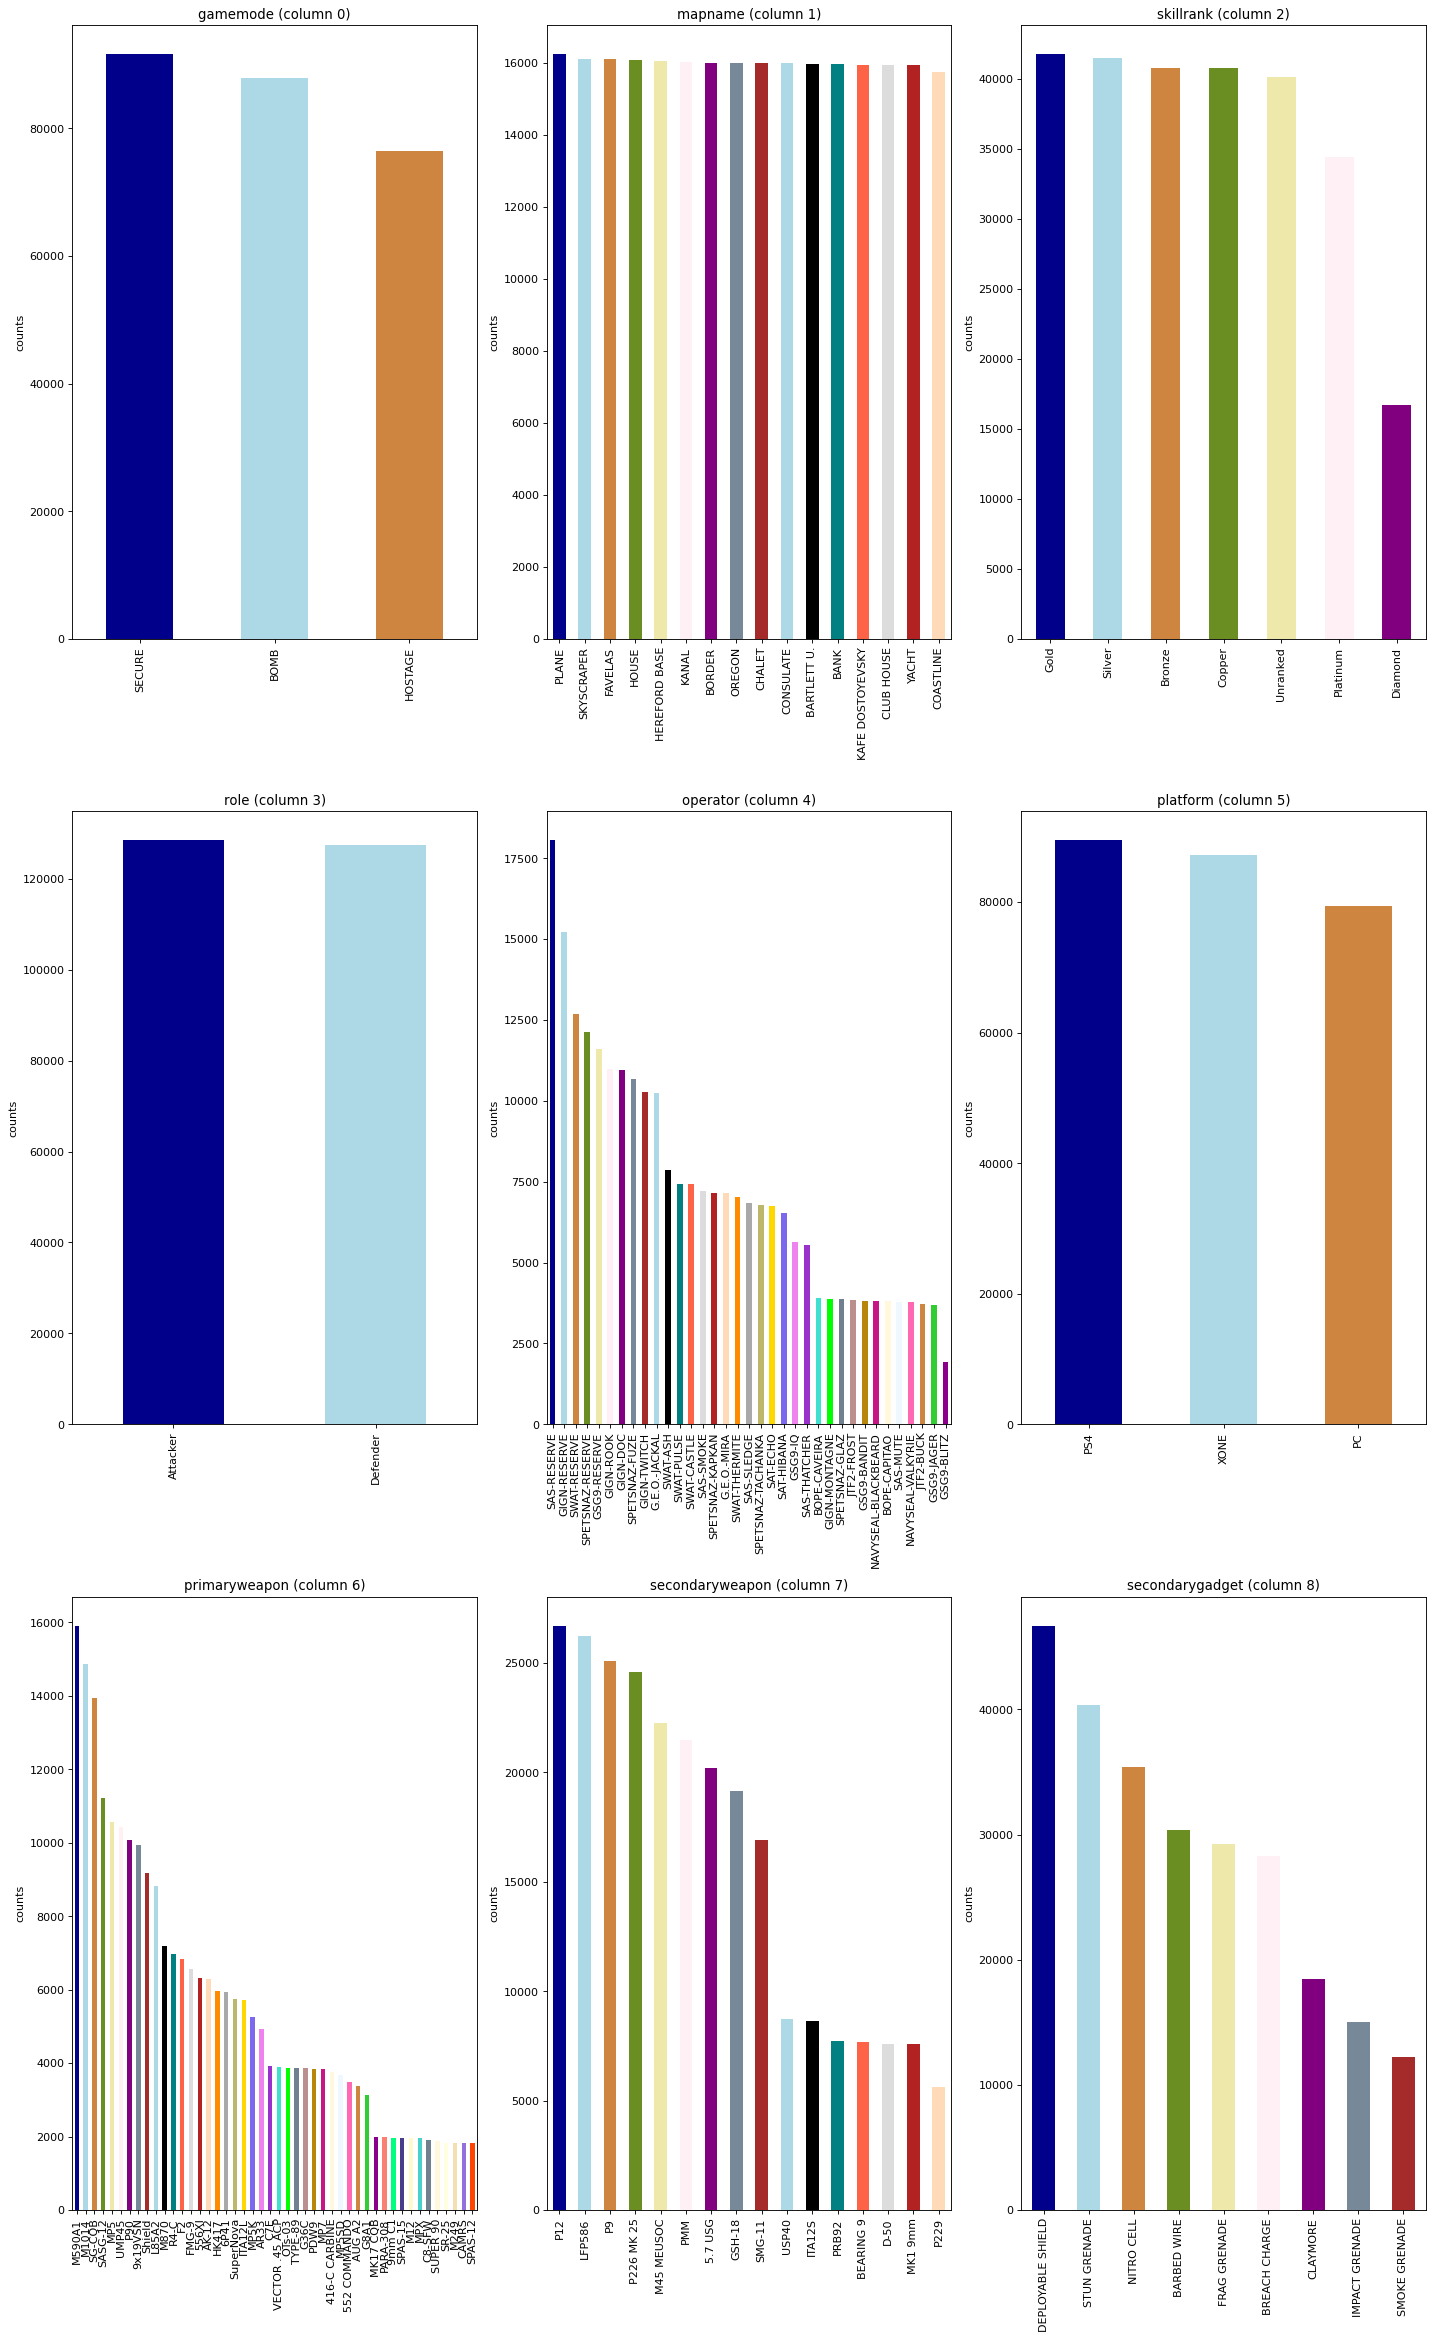

In [7]:
plotPerColumnDistribution(df, 10, 3)

* From above plots, we can easily findout all unique values and their frequency for each categorical columns.

### Calculate Win Rate and KD Rate for each Round.

In [8]:
## winning rate will be calculated by numbers of won / played counts
df['win_rate'] = df['haswon']/df['count']
##  kill/death rate will be calculated by number of kills / number of dead,but if the case of dead = 0, it will be treated as 1.
## because we need to pay attention about division zero
df['kd_rate'] = df['nbkills']/(df['isdead']+1)
## overall wining rate will be the average value of win rate and kd rate
df['win_kd_rate'] = (df['win_rate']+df['kd_rate'])/2
df.tail()

,Unnamed: 0,gamemode,mapname,skillrank,role,operator,platform,primaryweapon,secondaryweapon,secondarygadget,haswon,nbkills,isdead,count,win_rate,kd_rate,win_kd_rate
255966,255966,SECURE,YACHT,Unranked,Defender,SWAT-RESERVE,XONE,M1014,M45 MEUSOC,NITRO CELL,9,12,16,21,0.428571,0.705882,0.567227
255967,255967,SECURE,YACHT,Unranked,Defender,SWAT-RESERVE,XONE,UMP45,5.7 USG,DEPLOYABLE SHIELD,2,1,2,3,0.666667,0.333333,0.500000
255968,255968,SECURE,YACHT,Unranked,Defender,SWAT-RESERVE,XONE,UMP45,5.7 USG,NITRO CELL,4,4,7,9,0.444444,0.500000,0.472222
255969,255969,SECURE,YACHT,Unranked,Defender,SWAT-RESERVE,XONE,UMP45,M45 MEUSOC,DEPLOYABLE SHIELD,2,3,7,9,0.222222,0.375000,0.298611
255970,255970,SECURE,YACHT,Unranked,Defender,SWAT-RESERVE,XONE,UMP45,M45 MEUSOC,NITRO CELL,21,20,43,54,0.388889,0.454545,0.421717


### [Q-1] Find the best Map for Attacker/Defender.

In [9]:
## get unique names of map as a list
map_lists =list(df['mapname'].unique())

## calculate averate win rate per map per roles
win_ratio_attack=[]
kd_attack = []
win_attack = []
kd_defend=[]
win_defend = []
for curr_map in map_lists:
    df_map = df[df['mapname']==curr_map]
    df_att = df_map[df_map["role"]=="Attacker"]
    kd_attack.append(sum(df_att.kd_rate)/len(df_att))
    win_attack.append(sum(df_att.win_rate)/len(df_att))
    df_def = df_map[df_map["role"]=="Defender"]
    kd_defend.append(sum(df_def.kd_rate)/len(df_def))
    win_defend.append(sum(df_def.win_rate)/len(df_def))
df_map_win=pd.DataFrame({'MapName':map_lists,'Attacker_KD':kd_attack,'Defender_KD':kd_defend,'Attacker_Win':win_attack,'Defender_Win':win_defend})
df_map_win

,MapName,Attacker_KD,Defender_KD,Attacker_Win,Defender_Win
0,BANK,0.760146,0.773018,0.433699,0.515351
1,BARTLETT U.,0.744050,0.775708,0.430204,0.519034
2,BORDER,0.780842,0.756239,0.461092,0.486467
3,CHALET,0.829062,0.692268,0.501320,0.441277
4,CLUB HOUSE,0.813228,0.701462,0.479792,0.464627
5,COASTLINE,0.790734,0.714023,0.472656,0.478166
6,CONSULATE,0.785745,0.763711,0.451642,0.498379
7,FAVELAS,0.848066,0.692700,0.511960,0.437649
8,HEREFORD BASE,0.786157,0.755731,0.459305,0.492486
9,HOUSE,0.833793,0.669240,0.505253,0.434486


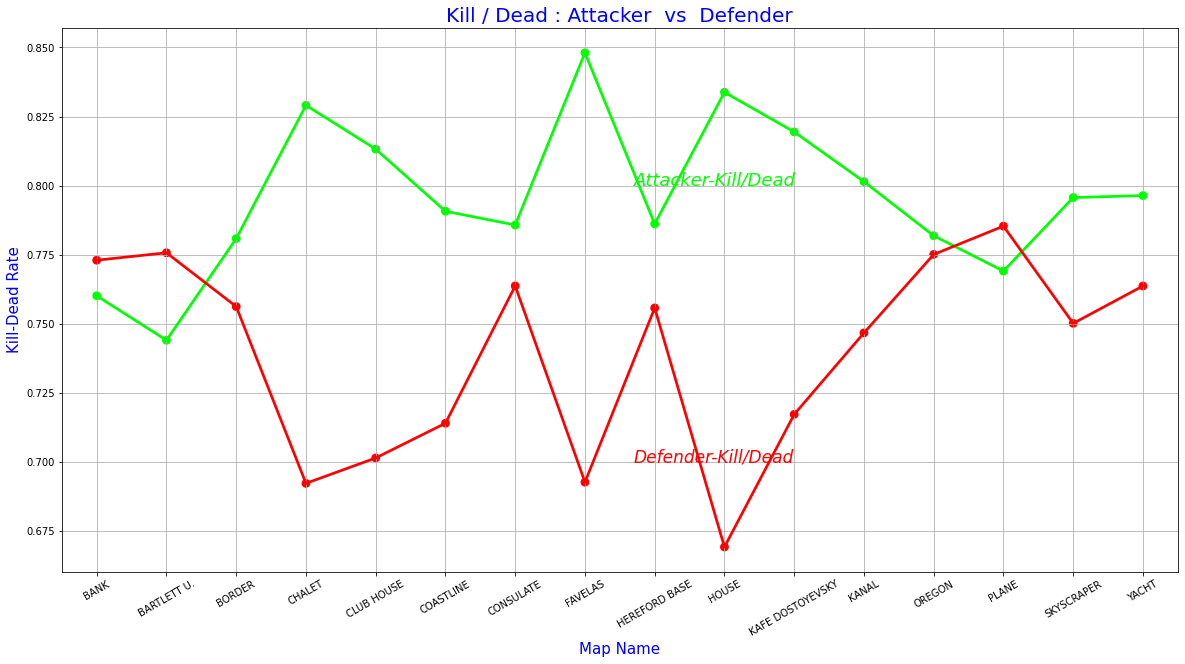

In [10]:
#Visualization of kill/Dead rate per role per map
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='MapName',y='Attacker_KD',data=df_map_win,color='lime',alpha=0.8)
sns.pointplot(x='MapName',y='Defender_KD',data=df_map_win,color='red',alpha=0.8)
plt.text(7.7,0.7,'Defender-Kill/Dead',color='red',fontsize = 17,style = 'italic')
plt.text(7.7,0.8,'Attacker-Kill/Dead',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation=30)
plt.xlabel('Map Name',fontsize = 15,color='blue')
plt.ylabel('Kill-Dead Rate',fontsize = 15,color='blue')
plt.title('Kill / Dead : Attacker  vs  Defender',fontsize = 20,color='blue')
plt.grid()
## save plot into rainbow6_visualization_plot folder
plt.savefig("rainbow6_visualization_plots/2_KD_Rate_Att_Def.png")
plt.show()

* Based on Kill/Dead Rate, above result shows that : 
    >* FAVELAS is the best map for Attacker.
    >* PLANE is the best map for Defender.

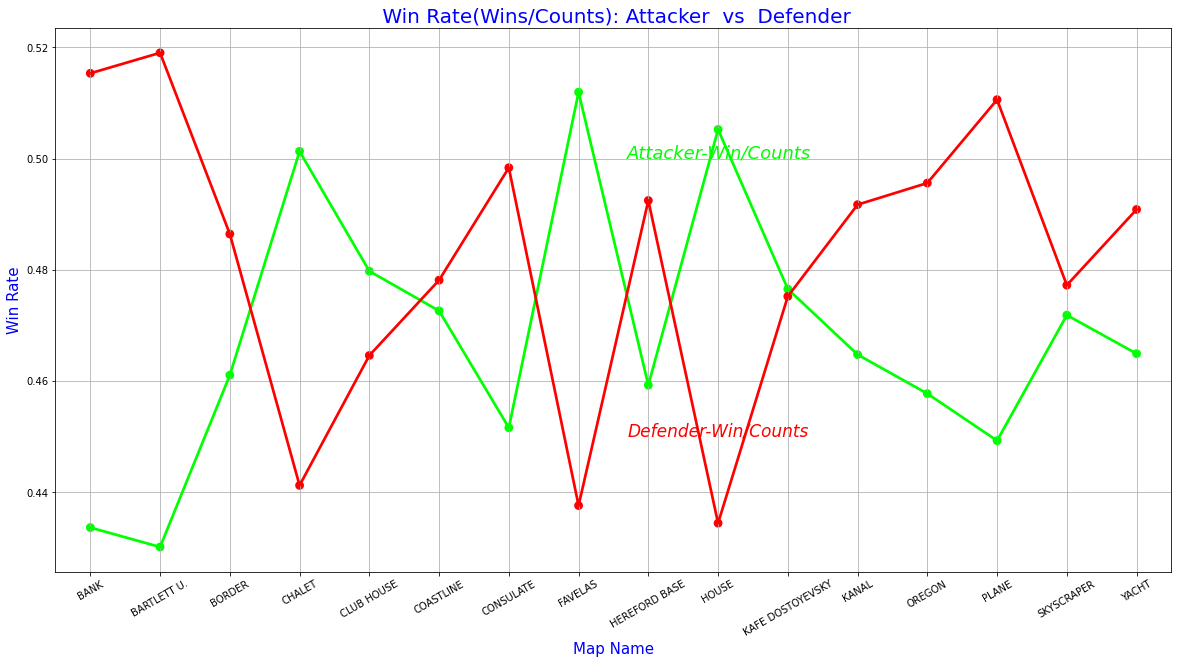

In [11]:
#Visualization of win rate per role per map
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='MapName',y='Attacker_Win',data=df_map_win,color='lime',alpha=0.8)
sns.pointplot(x='MapName',y='Defender_Win',data=df_map_win,color='red',alpha=0.8)
plt.text(7.7,0.45,'Defender-Win/Counts',color='red',fontsize = 17,style = 'italic')
plt.text(7.7,0.5,'Attacker-Win/Counts',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation=30)
plt.xlabel('Map Name',fontsize = 15,color='blue')
plt.ylabel('Win Rate',fontsize = 15,color='blue')
plt.title(' Win Rate(Wins/Counts): Attacker  vs  Defender',fontsize = 20,color='blue')
plt.grid()
plt.savefig("rainbow6_visualization_plots/3_Win_Rate_Att_Def.png")
plt.show()

* Based on Win Rate, above result shows that : 
    >* FAVELAS is the best map for Attacker, and worst for Defender.
    >* BARTLETT U. is the best map for Defender, and worst for Attacker

### [Q-2] Find the Best Skill Rank by Attacker/Defender

In [12]:
### calculate win rate for each roles per skill level
rank_lists =list(df['skillrank'].unique())
win_ratio_attack=[]
kd_attack = []
win_attack = []
kd_defend=[]
win_defend = []
for curr_rank in rank_lists:
    df_rank = df[df['skillrank']==curr_rank]
    df_att = df_rank[df_rank["role"]=="Attacker"]
    kd_attack.append(sum(df_att.kd_rate)/len(df_att))
    win_attack.append(sum(df_att.win_rate)/len(df_att))
    df_def = df_rank[df_rank["role"]=="Defender"]
    kd_defend.append(sum(df_def.kd_rate)/len(df_def))
    win_defend.append(sum(df_def.win_rate)/len(df_def))
df_rank_win=pd.DataFrame({'rank_lists':rank_lists,'Attacker_KD':kd_attack,'Defender_KD':kd_defend,'Attacker_Win':win_attack,'Defender_Win':win_defend})
df_rank_win = df_rank_win.set_index('rank_lists')
df_rank_win

,Attacker_KD,Defender_KD,Attacker_Win,Defender_Win
rank_lists,,,,
Bronze,0.767430,0.702815,0.471103,0.474876
Copper,0.737386,0.639383,0.465191,0.442757
Diamond,1.093179,1.035280,0.546655,0.576351
Gold,0.836544,0.812256,0.473665,0.503401
Platinum,0.918347,0.889366,0.482968,0.512650
Silver,0.792283,0.744264,0.467365,0.488043
Unranked,0.610620,0.554685,0.416987,0.436463


* Visualization of Skill Rank vs Map List

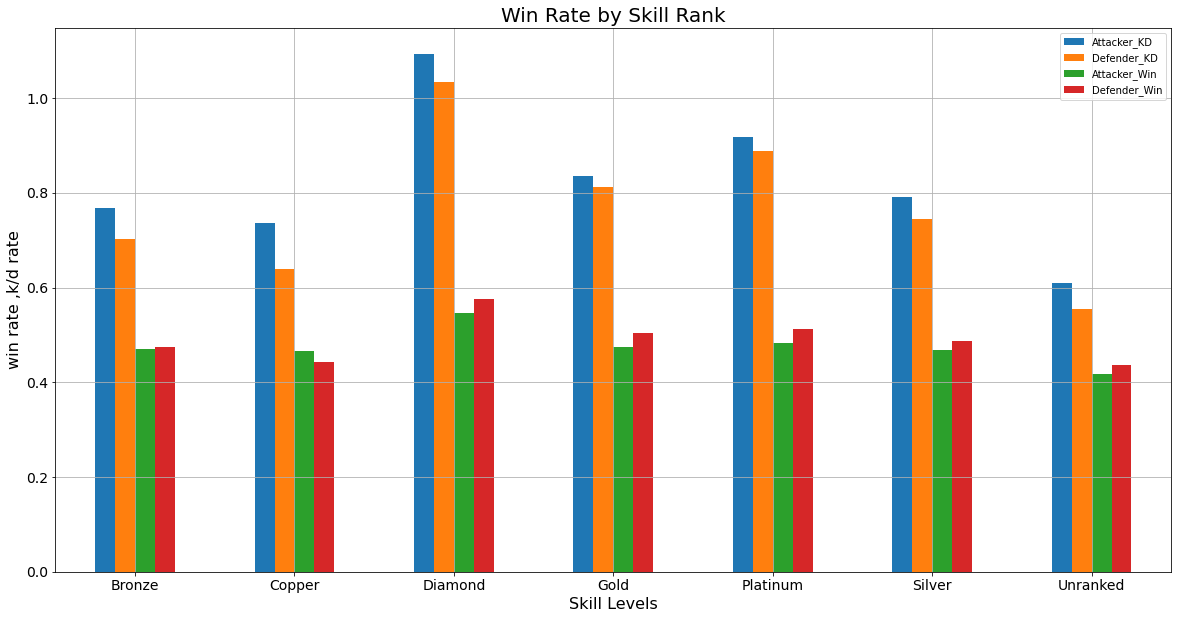

In [13]:
ax = df_rank_win.plot(figsize=(20,10),kind='bar',rot=0,fontsize=14,grid=True)
ax.set_title("Win Rate by Skill Rank",fontsize= 20)
ax.set_ylabel("win rate ,k/d rate",fontsize= 16)
ax.set_xlabel("Skill Levels",fontsize= 16)
ax.figure.savefig('rainbow6_visualization_plots/4_WinRate-SkillRank.png')

* From above result plot :
   >* Diamond is the top skill level for Attacker/Defender
   >* Unranked is the beginer level for Attracker/Defender
* Skill Level Order :
   >*  Diamond / Platinum / Gold / Silver / Bronze / Copper / Unranked

### [Q-3] Which weapons should a new player use?

In [14]:
df.head(2)

,Unnamed: 0,gamemode,mapname,skillrank,role,operator,platform,primaryweapon,secondaryweapon,secondarygadget,haswon,nbkills,isdead,count,win_rate,kd_rate,win_kd_rate
0,0,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,PC,M249,PRB92,CLAYMORE,5,11,10,15,0.333333,1.00,0.666667
1,1,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,PC,M249,PRB92,STUN GRENADE,4,6,7,9,0.444444,0.75,0.597222


* We can recognize that new players are Unranked Level.
* So,to find the best weapon for new player, we need to treat data for only Unranked Level of SkillRank.

In [15]:
df_new =df[df['skillrank']=='Unranked']
df_new.shape

(40133, 17)

In [16]:
## Get kill/dead rate matrix against primary and secondary weapons
weapon = df_new.groupby(['primaryweapon','secondaryweapon'])['kd_rate'].mean().sort_values(ascending=False)
## filter the top row for eacy primary weapon
weapon_top = weapon.groupby('primaryweapon').head(1)
## filter top 10 weapons that have higher kill/dead rate
weapon_top_10 = weapon_top.head(10).unstack()
weapon_top_10

secondaryweapon,BEARING 9,ITA12S,D-50,5.7 USG,P12,PMM,MK1 9mm,P9
primaryweapon,,,,,,,,
TYPE-89,0.941744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C7E,NaN,0.89861,NaN,NaN,NaN,NaN,NaN,NaN
MK17 CQB,NaN,NaN,0.877293,NaN,NaN,NaN,NaN,NaN
R4-C,NaN,NaN,NaN,0.867224,NaN,NaN,NaN,NaN
G36C,NaN,NaN,NaN,0.855019,NaN,NaN,NaN,NaN
MP7,NaN,NaN,NaN,NaN,0.828648,NaN,NaN,NaN
OTs-03,NaN,NaN,NaN,NaN,NaN,0.822884,NaN,NaN
MP5SD,0.808648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9mm C1,NaN,NaN,NaN,NaN,NaN,NaN,0.805775,NaN


* Visualization of Kill/Dead by weapons

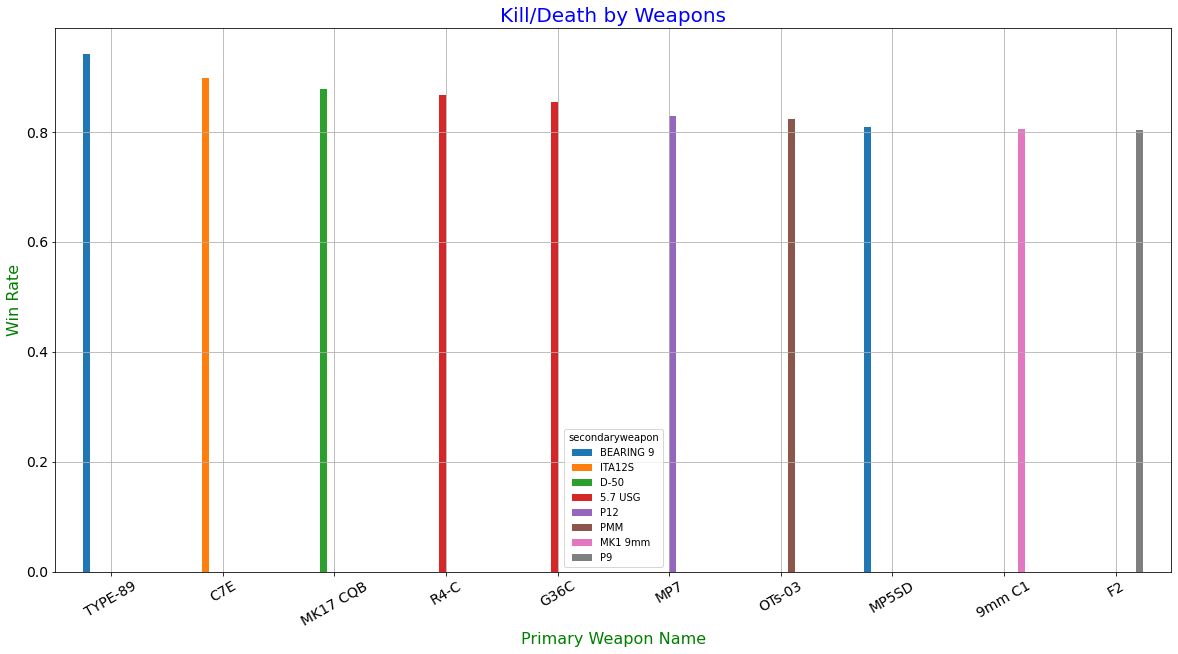

In [17]:
fig = weapon_top_10.plot(figsize=(20,10),kind='bar',fontsize=14,grid=True)
plt.xlabel('Primary Weapon Name',fontsize = 16,color='green')
plt.ylabel('Win Rate',fontsize = 16,color='green')
plt.xticks(rotation=30)
plt.title('Kill/Death by Weapons',fontsize = 20,color='blue')
plt.savefig("rainbow6_visualization_plots/5_KD_Rate_Weapon.png")
plt.show()

* From above plot shows that (primaryweapon : [TYPE-89],secondaryweapon : [BEARING 9]) is the best weapon for the new players

### [Q-4] What is the best secondarygadget for the Top Level Players

In [18]:
## we need to filter data for diamond level players
df_top = df[df['skillrank']=='Diamond']

In [19]:
# get gadget list and their average kd rate for diamond level players
gadget_list = df_top['secondarygadget'].unique()
kd_rate = []
for gadget in gadget_list:
    temp = df_top[df_top['secondarygadget']==gadget]
    kd_val = temp['kd_rate'].mean()
    kd_rate.append(kd_val)
diamond_gadget=pd.DataFrame({'Secondary Gadget':gadget_list,'KD_Rate':kd_rate})
diamond_gadget

,Secondary Gadget,KD_Rate
0,STUN GRENADE,0.997787
1,CLAYMORE,1.130273
2,BREACH CHARGE,1.190542
3,SMOKE GRENADE,1.197655
4,FRAG GRENADE,0.946913
5,BARBED WIRE,1.083955
6,IMPACT GRENADE,1.105092
7,DEPLOYABLE SHIELD,0.894207
8,NITRO CELL,1.067135


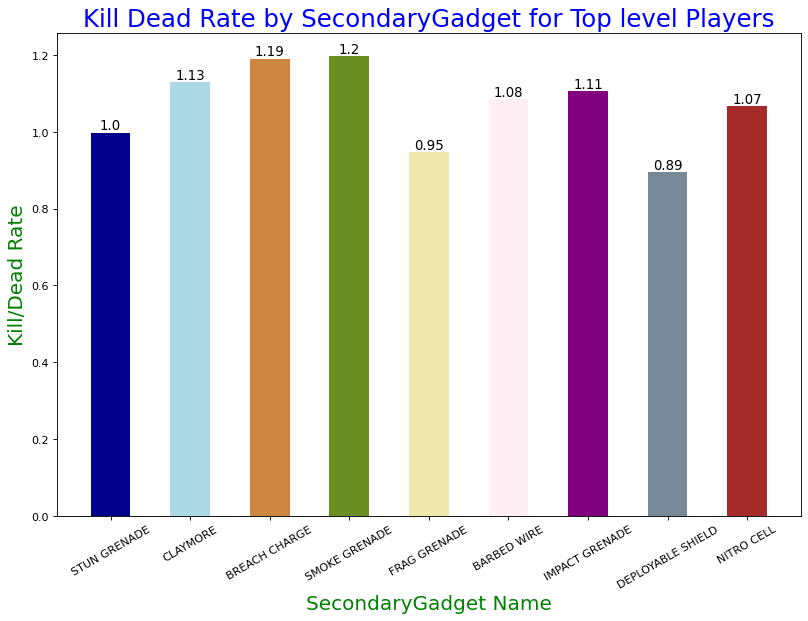

In [20]:
## get all color map list to display plots with this color map list
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
## get color list with length of rank list
c = random.choices(all_colors, k=len(gadget_list))

# Plot Bars
plt.figure(figsize=(12,8), dpi= 80)
plt.bar(diamond_gadget['Secondary Gadget'], diamond_gadget['KD_Rate'], color=c, width=.5)
for i, val in enumerate(diamond_gadget['KD_Rate'].values):
    plt.text(i, val, np.round(float(val),2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(diamond_gadget['Secondary Gadget'])
plt.title("Kill Dead Rate by SecondaryGadget for Top level Players", fontsize=22,color='blue')
plt.ylabel('Kill/Dead Rate',color = 'green',fontsize= 18)
plt.xlabel('SecondaryGadget Name',color = 'green',fontsize= 18)
plt.xticks(rotation=30)
plt.savefig("rainbow6_visualization_plots/6_KD_Gadget_Diamond.png")
plt.show()

* From above result plot,[SMOKE GRENADE] is the best gadget for top level players

### [Q-5] Which operators composition is the best for each map?

In [21]:
df.columns

Index(['Unnamed: 0', 'gamemode', 'mapname', 'skillrank', 'role', 'operator',
       'platform', 'primaryweapon', 'secondaryweapon', 'secondarygadget',
       'haswon', 'nbkills', 'isdead', 'count', 'win_rate', 'kd_rate',
       'win_kd_rate'],
      dtype='object')

* Get Correlation matrix of kd_rate between map names and operator compositions

In [22]:
# group by mapname and operator column and get ked_rate average value for each matrix
map_operator = df.groupby(['mapname','operator'])['kd_rate'].mean().sort_values(ascending=False)
map_operator_unstacked = map_operator.unstack()
map_operator_unstacked

operator,BOPE-CAPITAO,BOPE-CAVEIRA,G.E.O.-JACKAL,G.E.O.-MIRA,GIGN-DOC,GIGN-MONTAGNE,GIGN-RESERVE,GIGN-ROOK,GIGN-TWITCH,GSG9-BANDIT,...,SPETSNAZ-FUZE,SPETSNAZ-GLAZ,SPETSNAZ-KAPKAN,SPETSNAZ-RESERVE,SPETSNAZ-TACHANKA,SWAT-ASH,SWAT-CASTLE,SWAT-PULSE,SWAT-RESERVE,SWAT-THERMITE
mapname,,,,,,,,,,,,,,,,,,,,,
BANK,0.806980,0.992440,0.838770,0.839508,0.811795,0.545187,0.488631,0.855948,0.830637,0.871431,...,0.874449,1.093328,0.848545,0.536438,0.649538,1.113399,0.731795,0.824224,0.519059,0.719020
BARTLETT U.,0.779130,1.046462,0.848964,0.838048,0.830321,0.516075,0.511134,0.839607,0.814765,0.953423,...,0.753427,0.990026,0.779115,0.490968,0.578548,1.072463,0.755595,0.907712,0.585456,0.704548
BORDER,0.774030,0.952541,0.883820,0.832472,0.826622,0.544868,0.519650,0.803273,0.876303,0.925143,...,0.872694,0.996236,0.789849,0.583716,0.601404,1.110946,0.700592,0.891039,0.542910,0.741250
CHALET,0.904429,0.941111,0.938143,0.724955,0.751596,0.591654,0.467258,0.762647,0.930149,0.814036,...,0.920786,1.158488,0.669535,0.540151,0.550455,1.207378,0.662969,0.825976,0.528106,0.821248
CLUB HOUSE,0.881241,0.903585,0.892072,0.730610,0.781993,0.578495,0.463262,0.779018,0.886030,0.847650,...,0.960291,1.131364,0.719357,0.514275,0.578853,1.203638,0.639983,0.819796,0.510432,0.791170
COASTLINE,0.846735,0.966487,0.904012,0.716678,0.779091,0.521422,0.475572,0.802321,0.860401,0.870786,...,0.908593,1.093341,0.698289,0.545164,0.568668,1.147724,0.675777,0.849303,0.533809,0.723054
CONSULATE,0.800116,1.006925,0.878230,0.814056,0.842571,0.570287,0.486316,0.811605,0.853657,0.867099,...,0.981435,0.999574,0.835545,0.532521,0.602157,1.130932,0.726103,0.931719,0.547722,0.759765
FAVELAS,0.886463,0.935669,0.926362,0.732034,0.738646,0.554909,0.490479,0.756719,0.887477,0.894125,...,1.040798,1.206876,0.731694,0.525059,0.458647,1.199377,0.621276,0.840423,0.625079,0.777735
HEREFORD BASE,0.832988,0.920781,0.906787,0.831713,0.822928,0.563468,0.499385,0.833893,0.869048,0.912487,...,0.866148,1.045564,0.841574,0.524954,0.642862,1.138962,0.732702,0.857896,0.599652,0.738652


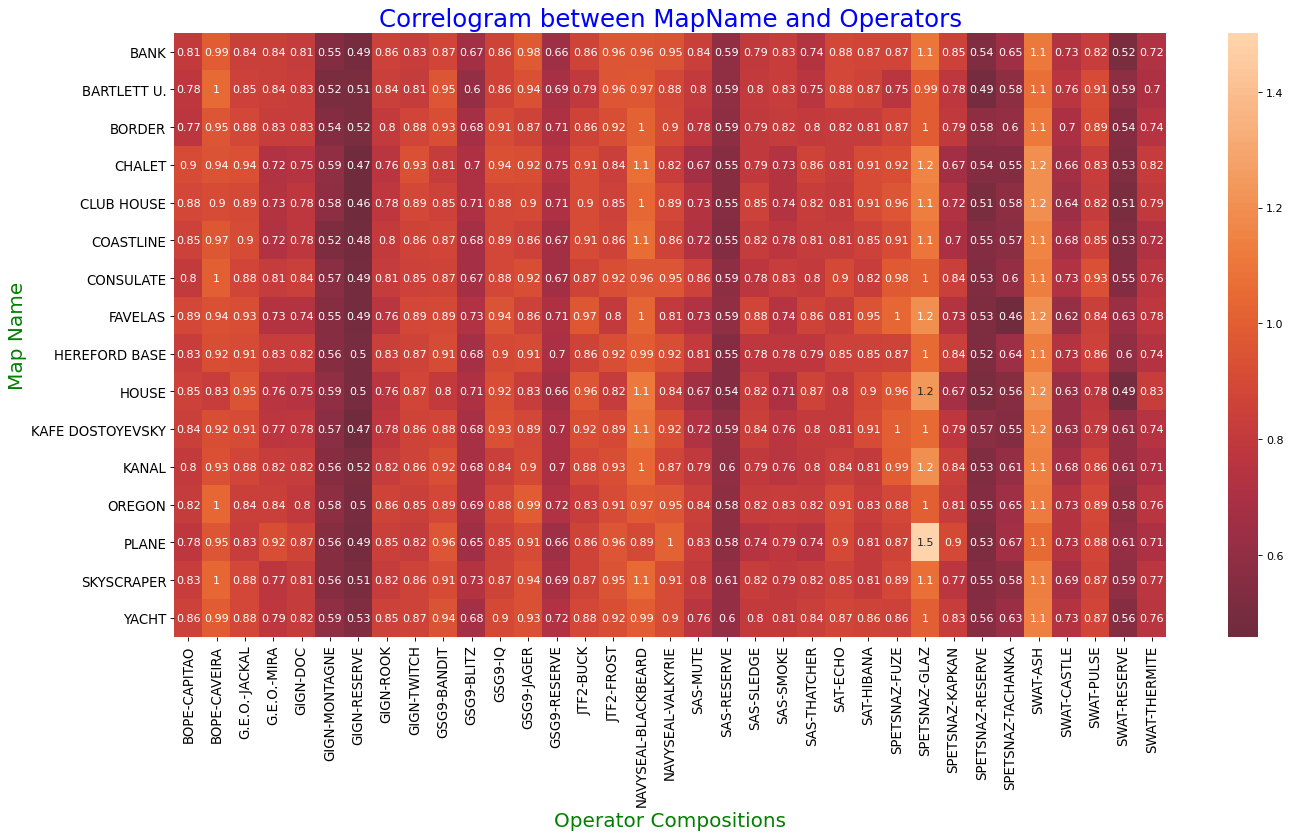

In [23]:
# Plot
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(map_operator_unstacked, xticklabels=map_operator_unstacked.columns, yticklabels=map_operator_unstacked.index, center=0, annot=True)

# Decorations
plt.title('Correlogram between MapName and Operators', fontsize=22,color = 'blue')
plt.xlabel('Operator Compositions',fontsize = 18,color='green')
plt.ylabel('Map Name',fontsize = 18,color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("rainbow6_visualization_plots/7_correlogram_map_operator.png")
plt.show()

* From above result, we can findout the best operator compositions for each map
   >* for example; for map[PLANE], Operator [SPETSNAZ-GLAZ] is the best operator compostion.
   >* it's kd rate is 1.5 , it's the max value of the matrix